In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mypath=[]
for name in glob("drive/My Drive/dataset/9043/*",recursive=True):
    mypath.append(name)
    print(name)    

drive/My Drive/dataset/9043/0
drive/My Drive/dataset/9043/1


In [ ]:
len(mypath)

2

In [ ]:
import os
mypath=[]
for dirname, _, filenames in os.walk("./drive/ My Drive/dataset/9043"):
    for filename in filenames:
        mypath.append(os.path.join(dirname, filename))
class0=[]
class1=[]
for i in mypath:
    if '1.png' in i:
        class1.append(i)
    else:
        class0.append(i)         

In [ ]:
mypath[0:5]

['./drive/ My Drive/dataset/9043/0/9041_idx5_x2251_y1251_class1.png',
 './drive/ My Drive/dataset/9043/0/9041_idx5_x2251_y1301_class1.png',
 './drive/ My Drive/dataset/9043/0/9041_idx5_x2251_y1351_class1.png',
 './drive/ My Drive/dataset/9043/0/9041_idx5_x2251_y1401_class1.png',
 './drive/ My Drive/dataset/9043/0/9041_idx5_x2251_y1451_class1.png']

In [ ]:
class0[0:5]


['./drive/ My Drive/dataset/9043/0/9043_idx5_x101_y1001_class0.png',
 './drive/ My Drive/dataset/9043/0/9043_idx5_x101_y1051_class0.png',
 './drive/ My Drive/dataset/9043/0/9043_idx5_x101_y1101_class0.png',
 './drive/ My Drive/dataset/9043/0/9043_idx5_x101_y701_class0.png',
 './drive/ My Drive/dataset/9043/0/9043_idx5_x101_y751_class0.png']

In [ ]:
print(len(class0),len(class1))

296 605


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
sampled_class0 = random.sample(class0,len(class0))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class0)
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
      if i.endswith('.png'):
        img = cv2.imread(i ,cv2.IMREAD_COLOR)
        img_sized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
        img_sized=img_sized/255
        img_arrays.append([img_sized, label])
    return img_arrays

class0=None;
class1=None;
import gc
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

print('done')

done


In [ ]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
len(combined_data)

901

In [ ]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [ ]:
print(len(X))
print(len(y))


901
901


In [ ]:
X = np.array(X).reshape(-1, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(810, 224, 224, 3) (91, 224, 224, 3) (810, 2) (91, 2)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import plot_model
import numpy as np

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.models import Sequential
def VGG16():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=2, activation="softmax"))
  return model



In [ ]:
model=VGG16()
model.summary()
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
# #Fit with no early stopping or other callbacks
# history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
#                     validation_data=(X_test, y_test))

In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
13/13 [==============================] - 1436s 109s/step - loss: 0.8212 - accuracy: 0.6663 - val_loss: 0.6285 - val_accuracy: 0.7253
Epoch 2/10
13/13 [==============================] - 1416s 109s/step - loss: 0.6214 - accuracy: 0.7114 - val_loss: 0.5951 - val_accuracy: 0.7253
Epoch 3/10
13/13 [==============================] - 1414s 109s/step - loss: 0.5990 - accuracy: 0.7205 - val_loss: 0.5885 - val_accuracy: 0.7253
Epoch 4/10
13/13 [==============================] - 1406s 108s/step - loss: 0.6016 - accuracy: 0.7113 - val_loss: 0.5886 - val_accuracy: 0.7253
Epoch 5/10
13/13 [==============================] - 1409s 108s/step - loss: 0.6109 - accuracy: 0.7007 - val_loss: 0.5881 - val_accuracy: 0.7253
Epoch 6/10
13/13 [==============================] - 1417s 109s/step - loss: 0.6195 - accuracy: 0.6929 - val_loss: 0.5886 - val_accuracy: 0.7253
Epoch 7/10
13/13 [==============================] - 1427s 110s/step - loss: 0.6014 - accuracy: 0.7129 - val_loss: 0.5891 - val_accuracy:

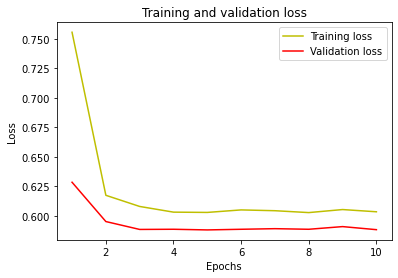

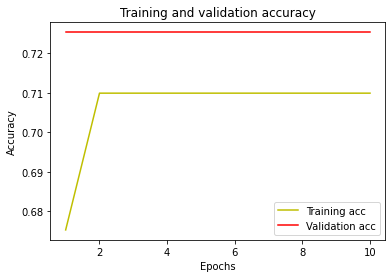

In [ ]:
#plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
e=model.evaluate(X_test,y_test)

3/3 [==============================] - 41s 13s/step - loss: 0.5883 - accuracy: 0.7253


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred[0]

array([0.71317375, 0.28682622], dtype=float32)

In [ ]:
y_test[0]

array([1., 0.], dtype=float32)

In [ ]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [ ]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=['Class-0','Class-1']))

Confusion Matrix
[[66  0]
 [25  0]]
Classification Report
              precision    recall  f1-score   support

     Class-0       0.73      1.00      0.84        66
     Class-1       0.00      0.00      0.00        25

    accuracy                           0.73        91
   macro avg       0.36      0.50      0.42        91
weighted avg       0.53      0.73      0.61        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classes=[0,1]
con_mat_df = pd.DataFrame(confusion_matrix(Y_test, Y_pred),index = classes, columns = classes)

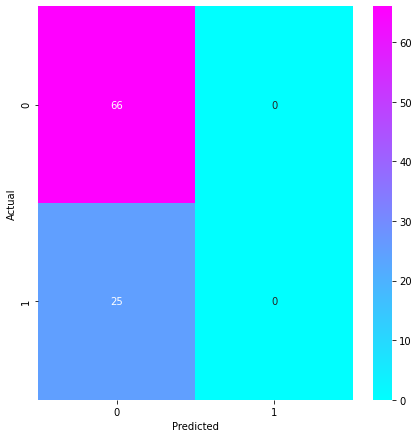

In [ ]:
con_mat_df
import seaborn as sns
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()